<h1>1. Prepare dataframes</h1>

Import libraries

In [4]:
import pandas as pd
import os

Prepare Renan's dataframe

In [5]:
renan = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "C:\\Users\\berna\\OneDrive\\Desktop\\letras"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Renan"

          renan = pd.concat([renan,df])
          
renan = renan.reset_index(drop=True)          

Prepare Claudinei's dataframe

In [6]:
claudinei = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "C:\\Users\\berna\\OneDrive\\Desktop\\letras"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Claudinei"

          claudinei = pd.concat([claudinei,df])
          
claudinei = claudinei.reset_index(drop=True)    

Prepare Guilherme's dataframe

In [7]:
guilherme = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "C:\\Users\\berna\\OneDrive\\Desktop\\letras"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Guilherme"

          guilherme = pd.concat([guilherme,df])
          
guilherme = guilherme.reset_index(drop=True)    

Merge dataframes

In [8]:
groupDataframe = pd.concat([renan,claudinei,guilherme])
groupDataframe = groupDataframe.reset_index(drop=True)
groupDataframe

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,Target letter,Target person
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
2366,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
2367,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
2368,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme


<h1>2. Training</h1>

<h3>2.1 Neural network</h3>

Import libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


Preparation for training

In [10]:
X = groupDataframe.iloc[:,0:180]
X

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2366,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2367,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2368,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y = groupDataframe.iloc[:,180]
Y

0       A
1       A
2       A
3       A
4       A
       ..
2365    O
2366    O
2367    O
2368    O
2369    O
Name: Target letter, Length: 2370, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<h3>Training</h3>

In [16]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4,3), random_state=1, max_iter=5000, activation='relu') #2 camadas ocultas com 2 neurônios
clf.fit(X_train, np.ravel(y_train))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 3), max_iter=5000,
              random_state=1, solver='lbfgs')

Testing

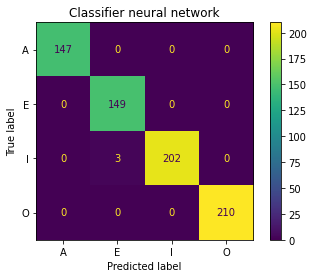

In [14]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Classifier neural network')
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       147
           E       0.98      1.00      0.99       149
           I       1.00      0.99      0.99       205
           O       1.00      1.00      1.00       210

    accuracy                           1.00       711
   macro avg       1.00      1.00      1.00       711
weighted avg       1.00      1.00      1.00       711

